In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

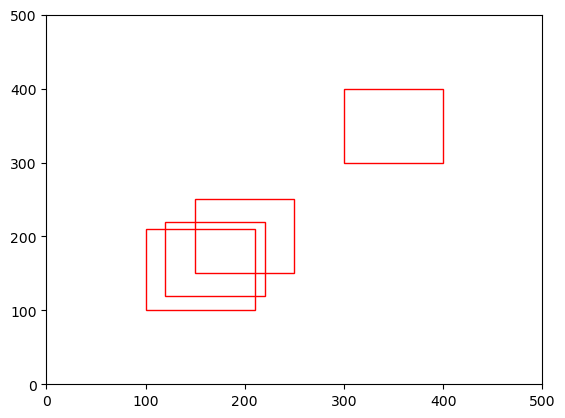

: 

In [ ]:
# 定义检测框
boxes = np.array([
    [100, 100, 210, 210],
    [150, 150, 250, 250],
    [120, 120, 220, 220],
    [300, 300, 400, 400]
])

# 创建一个图像
fig, ax = plt.subplots(1)

# 设置图像大小
ax.set_xlim(0, 500)
ax.set_ylim(0, 500)

# 绘制检测框
for box in boxes:
    x1, y1, x2, y2 = box
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# 显示图像
plt.show()


In [2]:
import numpy as np

def nms(boxes, scores, iou_threshold):
    """
    Perform Non-Maximum Suppression (NMS) on a set of bounding boxes.

    Args:
    boxes (numpy array): An array of shape (N, 4) where each row is [x1, y1, x2, y2].
    scores (numpy array): An array of shape (N,) containing the confidence scores for each box.
    iou_threshold (float): The IoU threshold to use for suppression.

    Returns:
    numpy array: An array of indices of the boxes to keep.
    """
    if len(boxes) == 0:
        return []

    # Convert boxes to float type to avoid division issues
    boxes = boxes.astype(float)

    # Get the coordinates of bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    # Compute the area of the bounding boxes and sort the bounding boxes by the scores
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    order = scores.argsort()[::-1]

    keep = []
    while order.size > 0:
        # The index of the current box with the highest score
        i = order[0]
        keep.append(i)

        # Compute the intersection areas
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0.0, xx2 - xx1 + 1)
        h = np.maximum(0.0, yy2 - yy1 + 1)
        intersection = w * h

        # Compute the IoU
        iou = intersection / (areas[i] + areas[order[1:]] - intersection)

        # Find the indices of boxes with IoU less than the threshold
        inds = np.where(iou <= iou_threshold)[0]
        order = order[inds + 1]

    return keep

# Example usage
boxes = np.array([
    [100, 100, 210, 210],
    [150, 150, 250, 250],
    [120, 120, 220, 220],
    [300, 300, 400, 400]
])
scores = np.array([0.9, 0.75, 0.8, 0.6])
iou_threshold = 0.5

keep = nms(boxes, scores, iou_threshold)
print("Indices of boxes to keep:", keep)


Indices of boxes to keep: [0, 1, 3]
